In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import time
%matplotlib inline
from pathlib import Path 
import os
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

In [2]:
#Find yesterday's date and convert it to string
today=date.today()
yesterday=today-timedelta(days=1)
ydate=yesterday.strftime("%d-%m-%Y")
todate=today.strftime("%d-%m-%Y")

#Specify Data folder
data_folder = Path("../data")

#Compute filename
data_file = ydate + ".csv"

#Compute complete filepath for the day
file_path = data_folder / data_file

#Read file to data frame
df=pd.read_csv(file_path)

df['Date']= pd.to_datetime(df['Date'], dayfirst=True)
df=df[df['Date']!=today] #Drop today's data
df_h=df[df['Status']=='Hospitalized']
df_r=df[df['Status']=='Recovered']
df_d=df[df['Status']=='Deceased']

C:\Users\joses\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


In [3]:
tamilnadu=df_h[df_h['State']=='Tamil Nadu']
tamilnadu=pd.DataFrame(tamilnadu.groupby(['Date', 'District'])['Num_Cases'].sum())
tamilnadu.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)
dist_daily=tamilnadu.pivot_table(index='Date', columns='District', fill_value=0)
dist_daily.tail()

Daily New Cases                                           \
District   Airport Quarantine Ariyalur Chengalpattu Chennai Coimbatore   
Date                                                                     
2020-05-14                  0       10           19     375          0   
2020-05-15                  0        0           20     310          0   
2020-05-16                  4        0           13     332         -1   
2020-05-17                  0        5           28     482          0   
2020-05-18                  5        2           43     364          0   

                                                                ...       \
District   Cuddalore Dharmapuri Dindigul Erode Kallakurichi     ...        
Date                                                            ...        
2020-05-14         1         -1        1     0            4     ...        
2020-05-15         3          0        2     0            0     ...        
2020-05-16         0          0        7     0           17     ...        
2020-05-17         1          0        0     0           17     ...        
2020-05-18         1          0        2     0            5     ...        

                                                                           \
District   Thiruvarur Thoothukkudi Tiruchirappalli Tirunelveli Tirupathur   
Date                                                                        
2020-05-14         -1            2               2          13          0   
2020-05-15          0           10               0          22          0   
2020-05-16          0            8               0          44          0   
2020-05-17          0           13               0          15          0   
2020-05-18          0           15               0          12          1   

                                                                    
District   Tiruppur Tiruvannamalai Vellore Viluppuram Virudhunagar  
Date                                                                
2020-05-14        0              7      -1        -10           -1  
2020-05-15        0              4       0          0            2  
2020-05-16        0              7       1          2            1  
2020-05-17        0              3       0          0            4  
2020-05-18        0              4       0          4            3  

[5 rows x 40 columns]

In [4]:
#Create a time series for TN Districts by Cumulative Cases 
dist_cum=dist_daily.cumsum()
dist_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)
dist_cum.tail()

Cumulative Cases                                           \
District   Airport Quarantine Ariyalur Chengalpattu Chennai Coimbatore   
Date                                                                     
2020-05-14                  9      348          430    5637        146   
2020-05-15                  9      348          450    5947        146   
2020-05-16                 13      348          463    6279        145   
2020-05-17                 13      353          491    6761        145   
2020-05-18                 18      355          534    7125        145   

                                                                ...       \
District   Cuddalore Dharmapuri Dindigul Erode Kallakurichi     ...        
Date                                                            ...        
2020-05-14       413          5      111    70           61     ...        
2020-05-15       416          5      113    70           61     ...        
2020-05-16       416          5      120    70           78     ...        
2020-05-17       417          5      120    70           95     ...        
2020-05-18       418          5      122    70          100     ...        

                                                                           \
District   Thiruvarur Thoothukkudi Tiruchirappalli Tirunelveli Tirupathur   
Date                                                                        
2020-05-14         32           38              67         114         28   
2020-05-15         32           48              67         136         28   
2020-05-16         32           56              67         180         28   
2020-05-17         32           69              67         195         28   
2020-05-18         32           84              67         207         29   

                                                                    
District   Tiruppur Tiruvannamalai Vellore Viluppuram Virudhunagar  
Date                                                                
2020-05-14      114            136      34        306           44  
2020-05-15      114            140      34        306           46  
2020-05-16      114            147      35        308           47  
2020-05-17      114            150      35        308           51  
2020-05-18      114            154      35        312           54  

[5 rows x 40 columns]

In [5]:
#Arrange districts in descending order of latest cumulative Cases
trans=dist_cum.transpose()
sort_dist=pd.DataFrame(trans[yesterday].sort_values(ascending=False))
mylist=sort_dist.index.tolist() #Export to a list (Array of Cumulative Cases and District names)

In [6]:
dist_list=[row[1] for row in mylist]#Creates a new list from the array above and extracts only the district names
#Split the States into three different categories according to their rank
top12=dist_list[0:12] #Top 12 districts
second12=dist_list[12:24] #13-24 Districts
last=dist_list[24:] #Last 14 Districts

In [7]:
#Select Top 12 Districts by Cumulative Cases
top12cum=pd.DataFrame()
for i in range(12):
    top12cum[top12[i]]=dist_cum['Cumulative Cases', top12[i]]
#top12cum.tail()

In [8]:
#Select the second 12 districts by Cumulative Cases
second12cum=pd.DataFrame()
for i in range(12):
    second12cum[second12[i]]=dist_cum['Cumulative Cases', second12[i]]
#second12cum.tail()

In [9]:
#Select Top 12 Districts by Daily New Cases
top12new=pd.DataFrame()
for i in range(12):
    top12new[top12[i]]=dist_daily['Daily New Cases', top12[i]]

In [10]:
#Select the second 12 Districts by Daily New Cases
second12new=pd.DataFrame()
for i in range(12):
    second12new[second12[i]]=dist_daily['Daily New Cases', second12[i]]

In [11]:
#Calculate 7-Day Rolling Average for Top 12 Districts
top12new7dra=pd.DataFrame()
for i in range(12):
    name=top12new.columns[i]
    top12new7dra[name]= top12new.iloc[:,i].rolling(window=7).mean()

In [12]:
top12new7dra2=pd.DataFrame()
for i in range(12):
    name=top12new7dra.columns[i]
    top12new7dra2[name]=top12new7dra.iloc[:,i]
top12new7dra2.reset_index(drop=True,inplace=True)

In [13]:
#Extract Data where average cases >5 (set range 1-6 to include all Districts)
top12new7dra_dat=pd.DataFrame()
for j in range(12):
    for i in range(60):
        if top12new7dra2.iloc[i,j] < 6.0:
            if top12new7dra2.iloc[i,j] > 1.0:
                name=top12new7dra2.columns[j]
                top12new7dra_dat[name]=top12new7dra2.iloc[i:,j]
                break
    continue
    
#Remove the date column and reset index
top12new7dra_dat.reset_index(drop=True,inplace=True)

#Remove NaN at top and align rows for different states
top12new7dra_dat2=pd.DataFrame()
for i in range(12):
    top12new7dra_dat[top12new7dra_dat.columns[i]].dropna(inplace=True)
    top12new7dra_dat[top12new7dra_dat.columns[i]].reset_index(drop=True,inplace=True)
    top12new7dra_dat2[top12new7dra_dat.columns[i]]=top12new7dra_dat[top12new7dra_dat.columns[i]]

# Top 13-24 Districts

In [14]:
#Calculate 7-Day Rolling Average for Top 13-24 States
second12new7dra=pd.DataFrame()
for i in range(12):
    name=second12new.columns[i]
    second12new7dra[name]= second12new.iloc[:,i].rolling(window=7).mean()

second12new7dra2=pd.DataFrame()
for i in range(12):
    name=second12new7dra.columns[i]
    second12new7dra2[name]=second12new7dra.iloc[:,i]
second12new7dra2.reset_index(drop=True,inplace=True)
    
#Extract Data where average cases >3 (set range 1-5 to include all states)
second12new7dra_dat=pd.DataFrame()
for j in range(12):
    for i in range(70):
        if second12new7dra2.iloc[i,j] < 5.0:
            if second12new7dra2.iloc[i,j] > 1.0:
                name=second12new7dra2.columns[j]
                second12new7dra_dat[name]=second12new7dra2.iloc[i:,j]
                break
    continue
    
#Remove the date column and reset index
second12new7dra_dat.reset_index(drop=True,inplace=True)

#Remove NaN at top and align rows for different states
second12new7dra_dat2=pd.DataFrame()
for i in range(12):
    second12new7dra_dat[second12new7dra_dat.columns[i]].dropna(inplace=True)
    second12new7dra_dat[second12new7dra_dat.columns[i]].reset_index(drop=True,inplace=True)
    second12new7dra_dat2[second12new7dra_dat.columns[i]]=second12new7dra_dat[second12new7dra_dat.columns[i]]

In [15]:
#Graph Starting date is 23rd April; Calculate number of days as integer
x=(today-date(2020,3,23)).days

In [16]:
#Daily New Cases for Tamilnadu
tn=df_h[df_h['State']=='Tamil Nadu']
tn_daily=pd.DataFrame(tn.groupby('Date')['Num_Cases'].sum())
tn_daily.rename(columns={'Num_Cases':'Daily New Cases'}, inplace=True)

In [17]:
#Calculate the 7 day Rolling Average for Daily New Cases in TN
tn_daily_7dra=pd.DataFrame()
tn_daily_7dra[tn_daily.columns[0]]=tn_daily.iloc[:,0].rolling(window=7).mean()

In [18]:
#Cumulative Cases for Tamilnadu
tn_cum=tn_daily.cumsum()
tn_cum.rename(columns={'Daily New Cases':'Cumulative Cases'}, inplace=True)

In [19]:
chart_folder= Path("../charts")
export_path=chart_folder/ydate
dist_path=export_path/"Districts"
try:
    os.mkdir(dist_path)
    print('New Directory Created for today')
except:
    print("Directory already exists")


New Directory Created for today


In [20]:
source="Source: www.covid19india.org"
ytitle="Number of Cases --->"
daf = "Days after Average Daily cases crossed 5 cases --->"
credit="Created by: Dr. Joseph S, MD"
update="Data updated till " + todate + " 08:00 AM"

# Plots Start Here

#Plot Cumulative Cases in TN as a linear plot
fig1_path=dist_path / "TN 1.jpg"
tn_cum.tail(x).plot(kind='line')
plt.title('Cumulative Cases in TN')
plt.text('23-03-2020',8000,"Linear Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig1_path, dpi=300, bbox_inches='tight')
plt.show()

#Plot Cumulative Cases in TN as a log plot
fig2_path=dist_path / "TN 2.jpg"
tn_cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in TN')
plt.text('23-03-2020',4000,"Logarithmic Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig2_path, dpi=300, bbox_inches='tight')
plt.show()

#Plot Daily New Cases in India (7DRA) as linear plot
fig3_path=dist_path / "TN 3.jpg"
tn_daily_7dra.tail(x).plot(kind='line')
plt.title('Daily New Cases in TN')
plt.text('23-03-2020',500,"Linear Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig3_path, dpi=300, bbox_inches='tight')
plt.show()

#Plot Daily New Cases in India (7DRA) as linear plot
fig4_path=dist_path / "TN 4.jpg"
tn_daily_7dra.tail(x).plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in TN')
plt.text('23-03-2020',300,"Log Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.savefig(fig4_path, dpi=300, bbox_inches='tight')
plt.show()

In [21]:
from matplotlib.pyplot import *
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

formatter = FuncFormatter(log_10_product)

#Create a function of footers
def footer1():
    plt.figtext(0.40, 0.04, credit, horizontalalignment='left')
    plt.figtext(0.40, 0.02, source, horizontalalignment='left')
    plt.figtext(0.40, 0.0, update, horizontalalignment='left')

def footer2():
    plt.figtext(0.45, 0.02, credit, horizontalalignment='left')
    plt.figtext(0.45, 0.0, source, horizontalalignment='left')
    plt.figtext(0.45, -0.02, update, horizontalalignment='left')
    
def footer3():
    plt.figtext(0.72, 0.04, credit, horizontalalignment='left')
    plt.figtext(0.72, 0.02, source, horizontalalignment='left')
    plt.figtext(0.72, 0.0, update, horizontalalignment='left')

C:\Users\joses\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


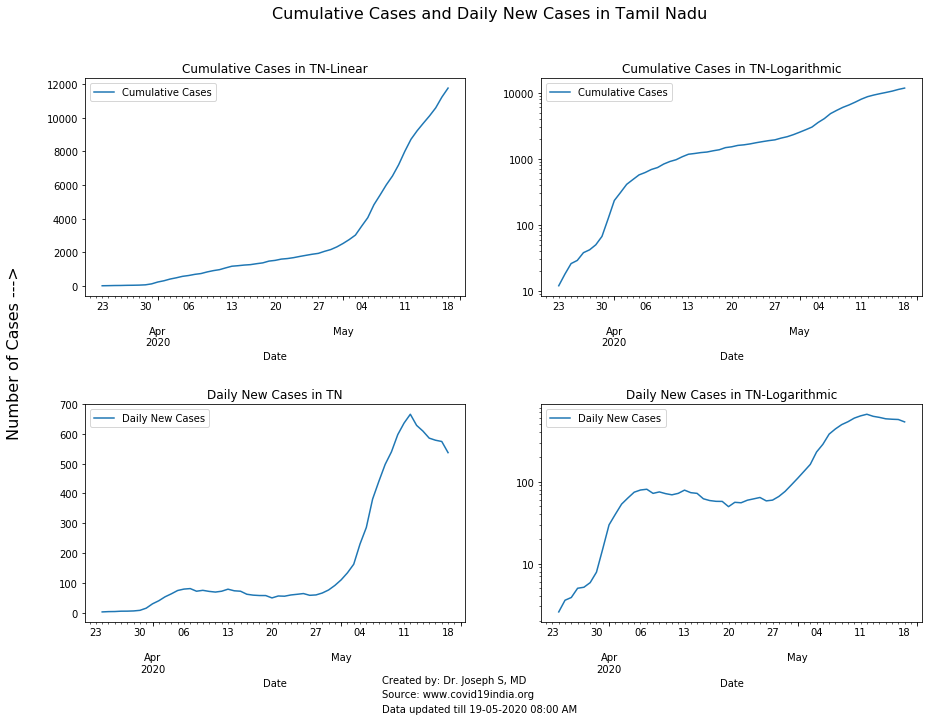

In [22]:
#Sub plots for TN
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
figtit="Cumulative Cases and Daily New Cases in Tamil Nadu"

tn_cum.tail(x).plot(kind='line', ax=axes[0,0], title='Cumulative Cases in TN-Linear')
tn_cum.tail(x).plot(kind='line', ax=axes[0,1], title='Cumulative Cases in TN-Logarithmic').set_yscale('log')
axes[0,1].yaxis.set_major_formatter(formatter)
tn_daily_7dra.tail(x).plot(kind='line', ax=axes[1,0], title='Daily New Cases in TN')
tn_daily_7dra.tail(x).plot(kind='line', ax=axes[1,1], title='Daily New Cases in TN-Logarithmic').set_yscale('log')
axes[1,1].yaxis.set_major_formatter(formatter)
fig.suptitle(figtit, fontsize=16)
footer1()
fig.text(0.06, 0.5, ytitle, ha='center', va='center', rotation='vertical', fontsize=16)


figtit=figtit+".jpg"
figpath=dist_path/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

#Plot Top 10 States Cumulative Cases in Log Scale
fig5_path=dist_path / "TN 5.jpg"
top12cum.tail(x).plot(kind='line').set_yscale('log')
plt.title('Cumulative Cases in Top 10 Districts - TN')
plt.text('23-03-2020',1000,"Logarithmic Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig5_path,dpi=300, bbox_inches='tight')
plt.show()

#Plot the 7DRA graph for Daily New Cases Day after case 10- Districts in Log Scale
fig6_path=dist_path / "TN 6.jpg"
top12new7dra_dat2.plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in Top 10 Districts')
#plt.text(0,900,"Log Scale - 7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.xlabel('Days after Case 10 ->')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig(fig6_path,dpi=300, bbox_inches='tight')
plt.show()

#Plot Top 11-20 Districts Cumulative Cases in Log Scale
fig7_path=dist_path / "TN 7.jpg"
second12cum.tail(x).plot(kind='line')#.set_yscale('log')
plt.title('Cumulative Cases in Top 11-20 Districts')
plt.text('23-03-2020',100,"Linear Scale")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.savefig(fig7_path,dpi=300, bbox_inches='tight')
plt.show()

#Plot Top 11-20 Districts Daily New Cases in Log Scale
fig8_path=dist_path / "TN 8.jpg"
second12new7dra_dat2.plot(kind='line').set_yscale('log')
plt.title('Daily New Cases in Top 11-20 States')
#plt.text(0,1,"Logarithmic Scale")
plt.text(15,10,"7-Day Rolling Average")
plt.figtext(0.99, 0.01, 'Source: www.covid19india.org', horizontalalignment='center')
plt.ylabel('Number of Cases')
plt.xlabel('Days after Case 3 ->')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#plt.savefig(fig8_path,dpi=300, bbox_inches='tight')
plt.show()

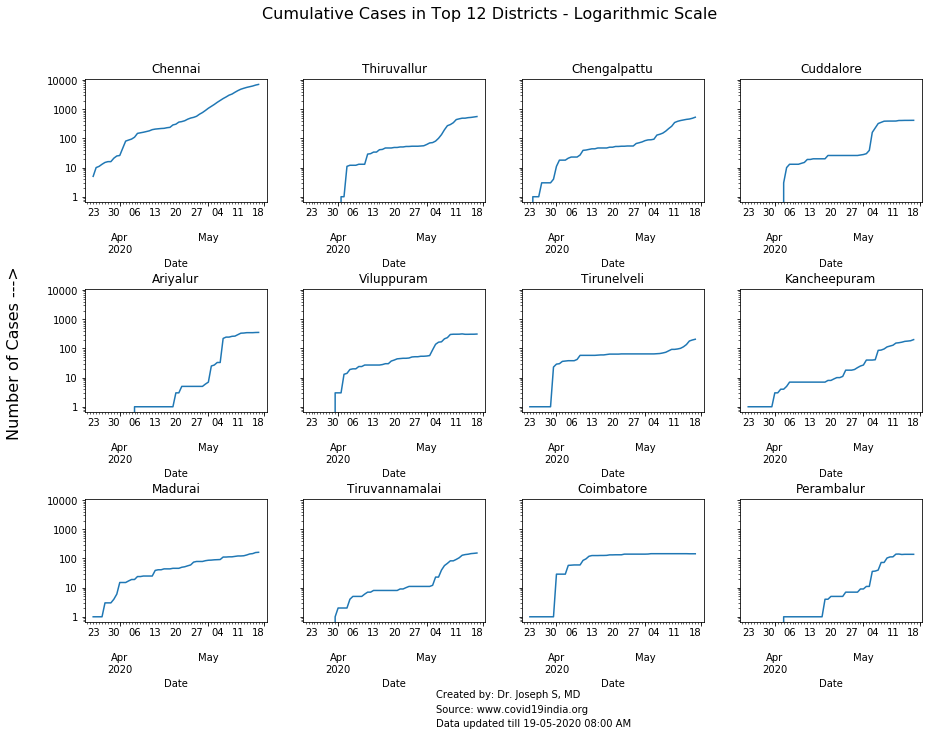

In [23]:
#Subplots for Top 12 Districts Cumulative
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.7)
figtit="Cumulative Cases in Top 12 Districts - Logarithmic Scale"

try:
    for i in range(3):
        for j in range(4):
            a=(i*4)+j
            top12cum[top12cum.columns[a]].tail(x).plot(kind='line', ax=axes[i,j], title=top12cum.columns[a]).set_yscale('log')
            axes[i,j].yaxis.set_major_formatter(formatter)
except: 
    print('Done')
fig.suptitle(figtit, fontsize=16)
footer2()
fig.text(0.06, 0.5, ytitle, ha='center', va='center', rotation='vertical', fontsize=16)

figtit=figtit+".jpg"
figpath=dist_path/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

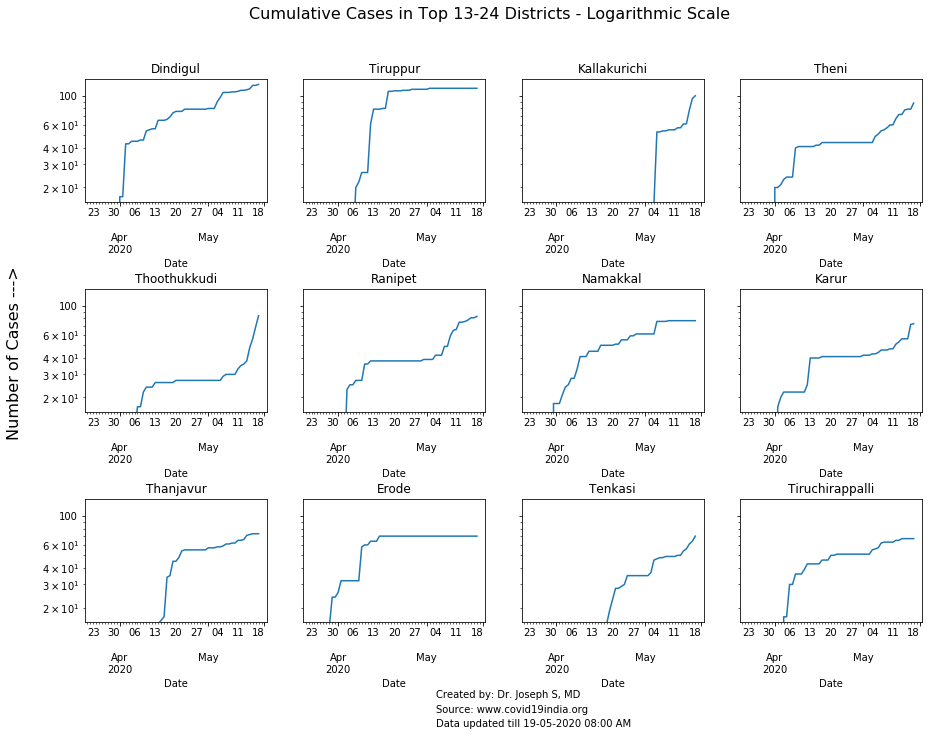

In [24]:
#Sub plots for top 13-24 Districts Cumulative
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.7)
figtit="Cumulative Cases in Top 13-24 Districts - Logarithmic Scale"

try:
    for i in range(3):
        for j in range(4):
            a=(i*4)+j
            second12cum[second12cum.columns[a]].tail(x).plot(kind='line', ax=axes[i,j], title=second12cum.columns[a]).set_yscale('log')
            axes[i,j].yaxis.set_major_formatter(formatter)
except: 
    print('Done')
fig.suptitle(figtit, fontsize=16)
footer2()
fig.text(0.06, 0.5, ytitle, ha='center', va='center', rotation='vertical', fontsize=16)

figtit=figtit+".jpg"
figpath=dist_path/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

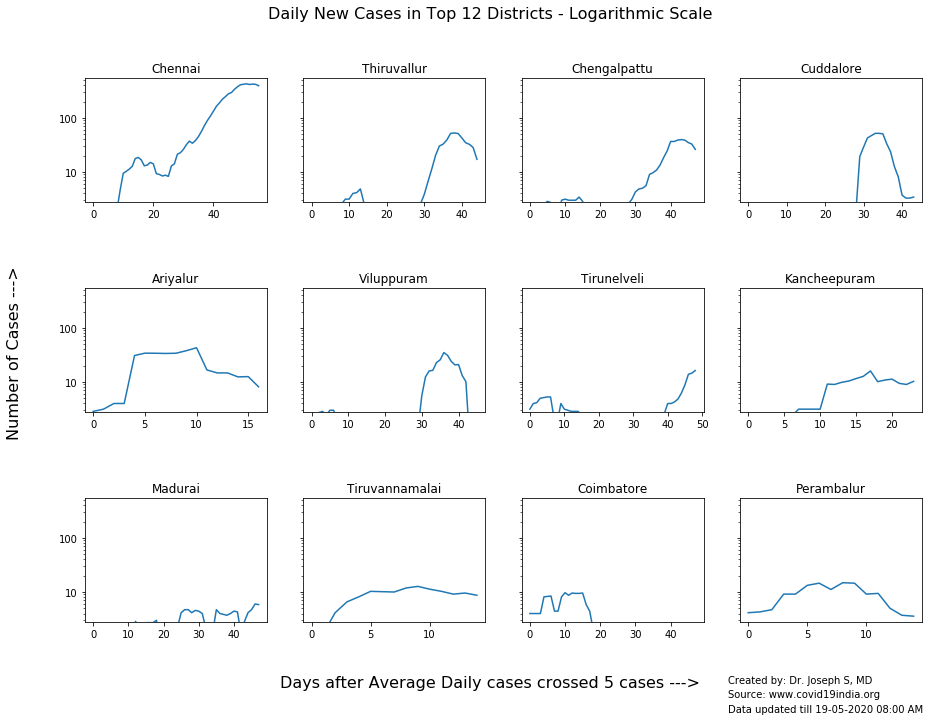

In [25]:
#Subplots for Daily New Cases - Top 12 Districts

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.7)
figtit="Daily New Cases in Top 12 Districts - Logarithmic Scale"

try:
    for i in range(3):
        for j in range(4):
            a=(i*4)+j
            top12new7dra_dat2[top12new7dra_dat2.columns[a]].tail(x).plot(kind='line', ax=axes[i,j] , title=top12new7dra_dat2.columns[a]).set_yscale('log')
            axes[i,j].yaxis.set_major_formatter(formatter)
except: 
    print('Done')
fig.suptitle(figtit, fontsize=16)
footer3()
fig.text(0.5, 0.04, daf, ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, ytitle, ha='center', va='center', rotation='vertical', fontsize=16)

figtit=figtit+".jpg"
figpath=dist_path/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()

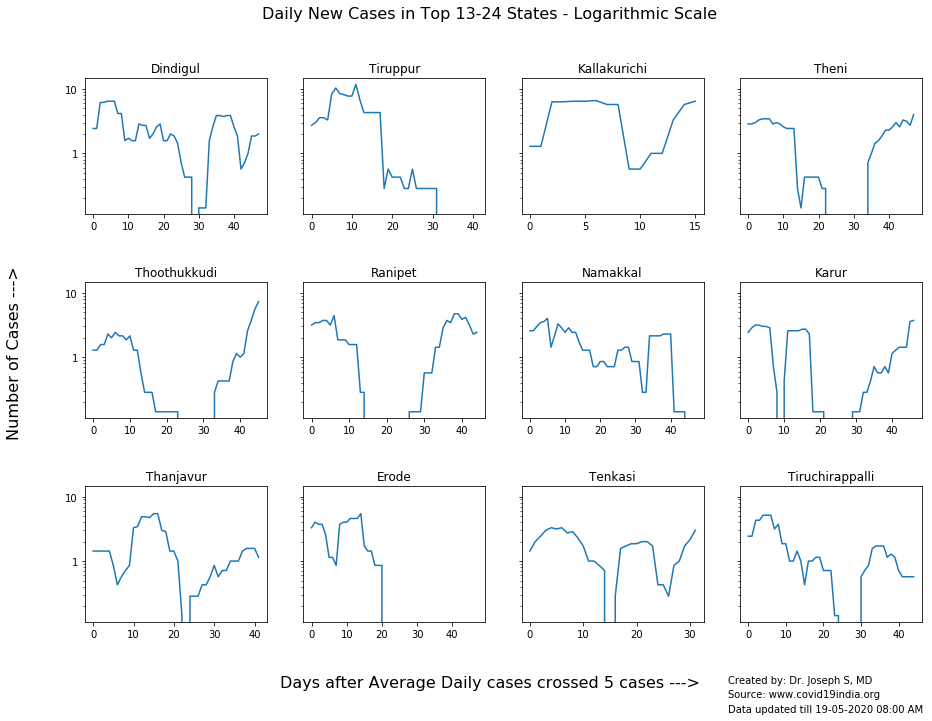

In [26]:
#Subplots for Daily New Cases - Top 13-24 Districts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.5)
figtit="Daily New Cases in Top 13-24 States - Logarithmic Scale"


for i in range(3):
    for j in range(4):
        a=(i*4)+j
        second12new7dra_dat2[second12new7dra_dat2.columns[a]].tail(x).plot(kind='line', ax=axes[i,j], title=second12new7dra_dat2.columns[a]).set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(formatter)

fig.suptitle(figtit, fontsize=16)
footer3()
fig.text(0.5, 0.04, daf, ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, ytitle, ha='center', va='center', rotation='vertical', fontsize=16)

figtit=figtit+".jpg"
figpath=dist_path/figtit
plt.savefig(figpath, dpi=300, bbox_inches='tight')
fig.show()